In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [260]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [261]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [262]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [263]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [264]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [265]:
tips = tips_df.drop(['sex', 'smoker', 'day', 'time'], axis=1)
tips.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [266]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [267]:
len(tips.describe())

8

In [268]:
tips.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [269]:
for index, item in enumerate(tips.describe().columns):
    print(index, item)

0 total_bill
1 tip
2 size


## Plotting the describe stats

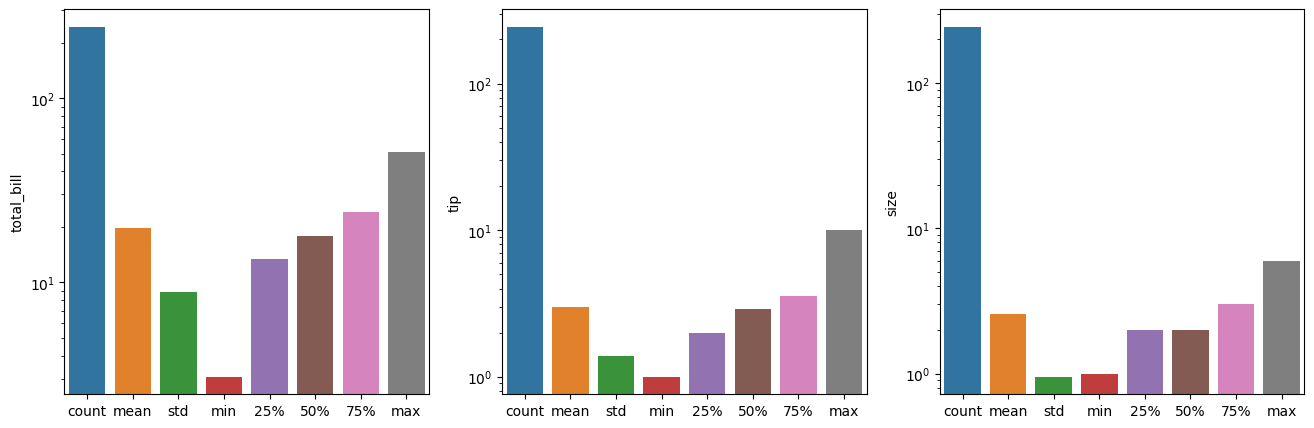

In [270]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5))
n = tips.describe()
length = len(n)

# for i in range(length):
#     ax.plot(x=n[i], y=tips.columns)
for index, item in enumerate(n.columns):
    sns.barplot(data=n, x=n.index, y=item, ax=axes[index], log=True)

    

## More plots from the stats

In [271]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [272]:
sex = tips_df.groupby(['sex']).agg({'tip':'count', 'total_bill':'count'})
sex

,tip,total_bill
sex,,
Male,157,157
Female,87,87


In [273]:
day = tips_df.groupby(['day']).agg({'sex':'count', 'tip':'sum', 'total_bill':'sum'})
day

,sex,tip,total_bill
day,,,
Thur,62,171.83,1096.33
Fri,19,51.96,325.88
Sat,87,260.40,1778.40
Sun,76,247.39,1627.16


In [274]:
tips.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [275]:
X,y = tips.drop(['tip'], axis=1), tips['tip']
X.shape, y.shape

((244, 2), (244,))

## 2. Train|Test split

## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 2), (74, 2), (170,), (74,))

In [277]:
X_train

,total_bill,size
234,15.53,2
227,20.45,4
180,34.65,4
5,25.29,4
56,38.01,4
...,...,...
106,20.49,2
14,14.83,2
92,5.75,2
179,34.63,2


In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


print(f"{scaled_X_train[:,0].mean()=} \t \t {scaled_X_train[:,1].mean()=} ")
print(f"{scaled_X_train[:,0].std()=} \t \t {scaled_X_train[:,1].std()=}")
print(f"{scaled_X_test[:,0].mean()=} \t \t {scaled_X_test[:,1].mean()=}")
print(f"{scaled_X_test[:,0].std()=} \t \t {scaled_X_test[:,1].std()=}")


scaled_X_train[:,0].mean()=6.791952621236252e-17 	 	 scaled_X_train[:,1].mean()=-1.0449157878825003e-16 
scaled_X_train[:,0].std()=1.0 	 	 scaled_X_train[:,1].std()=1.0
scaled_X_test[:,0].mean()=-0.19194537101655185 	 	 scaled_X_test[:,1].mean()=-0.04491163109964233
scaled_X_test[:,0].std()=0.9213997637553281 	 	 scaled_X_test[:,1].std()=1.0622880339691505


- > The  $\mu_{train}$ and $\sigma_{train}$ differ from the test data because it is the $\mu$ and $\sigma$ of the train data that has been scaled and used to scaled the test data

In [279]:
scaled_X_train

array([[-5.28067630e-01, -6.25518269e-01],
       [ 1.50987793e-02,  1.52272629e+00],
       [ 1.58277419e+00,  1.52272629e+00],
       [ 5.49433214e-01,  1.52272629e+00],
       [ 1.95371710e+00,  1.52272629e+00],
       [ 1.04733576e+00,  3.67097085e+00],
       [-1.16286577e+00, -6.25518269e-01],
       [ 5.95801078e-01,  4.48604011e-01],
       [-2.57491011e-02,  4.48604011e-01],
       [-1.00941022e+00, -6.25518269e-01],
       [ 2.03320487e+00,  1.52272629e+00],
       [-4.52995850e-01,  4.48604011e-01],
       [-2.16740542e-01,  1.52272629e+00],
       [-5.40211594e-01, -6.25518269e-01],
       [ 4.13641612e-01,  4.48604011e-01],
       [ 1.53098375e-01, -6.25518269e-01],
       [-7.03603116e-01, -6.25518269e-01],
       [ 9.62328005e-01,  4.48604011e-01],
       [-1.30196936e+00, -6.25518269e-01],
       [-4.40851885e-01, -6.25518269e-01],
       [-3.09476270e-01, -6.25518269e-01],
       [-1.10656194e+00, -6.25518269e-01],
       [ 2.19218040e+00,  1.52272629e+00],
       [-3.

## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 

In [280]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2)

polynomial_features_train = polynomial_instance.fit_transform(X_train)
polynomial_features_test = polynomial_instance.fit_transform(X_train)
polynomial_features_train.shape

(170, 6)

In [281]:
polynomial_features_train[:5], X_train[:5]

(array([[1.0000000e+00, 1.5530000e+01, 2.0000000e+00, 2.4118090e+02,
         3.1060000e+01, 4.0000000e+00],
        [1.0000000e+00, 2.0450000e+01, 4.0000000e+00, 4.1820250e+02,
         8.1800000e+01, 1.6000000e+01],
        [1.0000000e+00, 3.4650000e+01, 4.0000000e+00, 1.2006225e+03,
         1.3860000e+02, 1.6000000e+01],
        [1.0000000e+00, 2.5290000e+01, 4.0000000e+00, 6.3958410e+02,
         1.0116000e+02, 1.6000000e+01],
        [1.0000000e+00, 3.8010000e+01, 4.0000000e+00, 1.4447601e+03,
         1.5204000e+02, 1.6000000e+01]]),
      total_bill  size
 234       15.53     2
 227       20.45     4
 180       34.65     4
 5         25.29     4
 56        38.01     4)

In [282]:
polynomial_features_test[:3], X_test[:3]

(array([[1.0000000e+00, 1.5530000e+01, 2.0000000e+00, 2.4118090e+02,
         3.1060000e+01, 4.0000000e+00],
        [1.0000000e+00, 2.0450000e+01, 4.0000000e+00, 4.1820250e+02,
         8.1800000e+01, 1.6000000e+01],
        [1.0000000e+00, 3.4650000e+01, 4.0000000e+00, 1.2006225e+03,
         1.3860000e+02, 1.6000000e+01]]),
      total_bill  size
 24        19.82     2
 6          8.77     2
 153       24.55     4)

In [283]:
np.sum(polynomial_features_test[:,0])**2 ,np.sum(polynomial_features_test[:,1])

(28900.0, 3453.25)

## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

In [293]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
rmse_list_test = []
rmse_list_train = []

for degree in range(1,5):
    model_polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    train_features = model_polynomial.fit_transform(X_train)
    test_features = model_polynomial.fit_transform(X_test)
    model_linear_regression = LinearRegression()
    
    model_linear_regression.fit(train_features, y_train)
    
    y_pred_train = model_linear_regression.predict(train_features)
    y_pred_test = model_linear_regression.predict(test_features)
    rmse_list_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    rmse_list_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
rmse_list_test
    

[0.9180756712882111, 0.950745424561961, 1.049186667953214, 2.697633201159318]

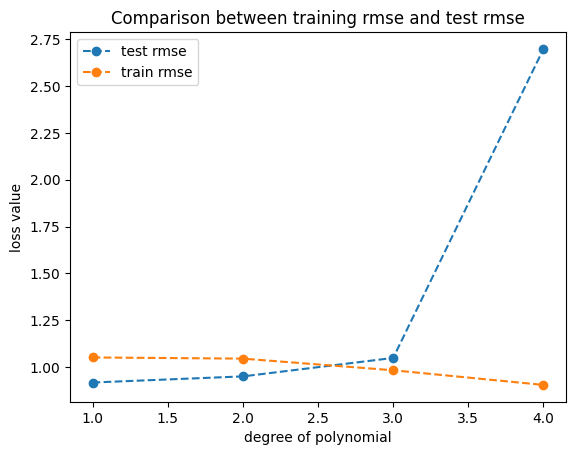

In [308]:
fig, axes =plt.figure(), plt.axes()
axes.plot(range(1,5), rmse_list_test, label="test rmse",marker='o', linestyle='dashed')
axes.plot(range(1,5), rmse_list_train, label="train rmse", marker='o', linestyle='dashed')
plt.title("Comparison between training rmse and test rmse")
plt.xlabel('degree of polynomial')
plt.ylabel('loss value')
plt.legend()